In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

In [2]:
train_data = datasets.FashionMNIST(
    root = 'data',
    download =True,
    train = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    download =True,
    train = False,
    transform = ToTensor()
)

In [4]:
print(len(train_data))  # Total number of training samples
image, label = train_data[0]
print(image.shape)      # Shape of a single image tensor

60000
torch.Size([1, 28, 28])


In [5]:
image.squeeze().shape

torch.Size([28, 28])

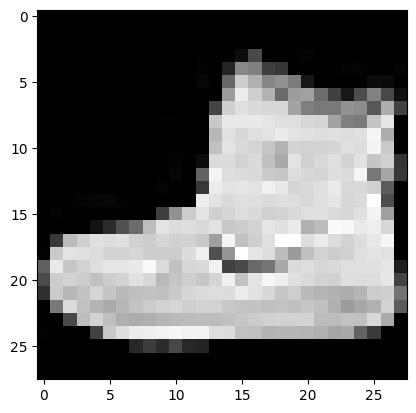

In [6]:
plt.imshow(image.squeeze(), cmap = "gray")

In [7]:
# Label mapping for FashionMNIST dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

labels_map[label]

'Ankle Boot'

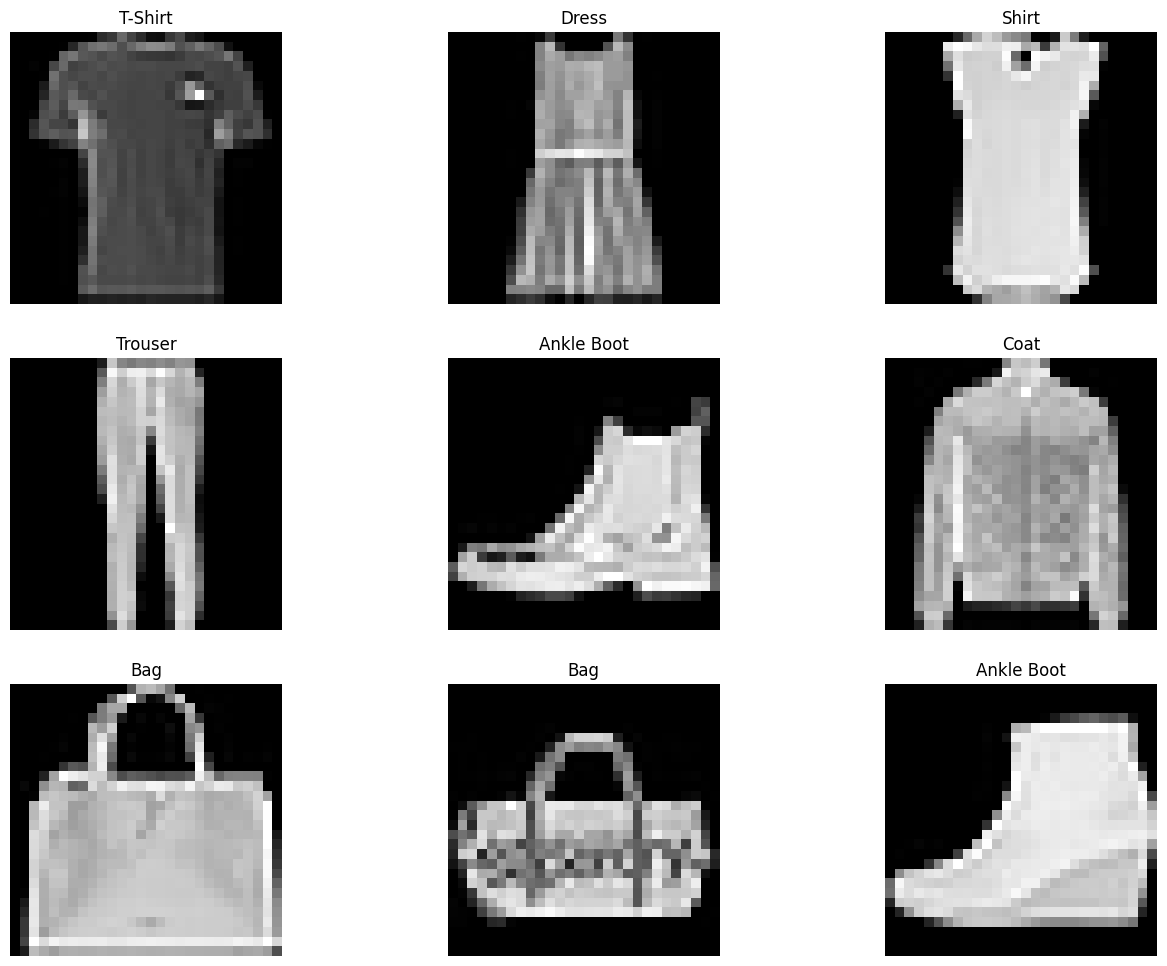

In [8]:
# Plot 9 random samples from training_data
figure = plt.figure(figsize=(16, 12))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [12]:
import torch.nn as nn

class ModelA(nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.linear(x)

In [14]:
class ModelB(nn.Module):
    def __init__(self):
        super(ModelB, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        return self.fc2(x)


In [13]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)

In [15]:
def train(model, loader, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in loader:
            # Forward
            logits = model(X_batch)
            loss = criterion(logits, y_batch)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

In [18]:
model_a = ModelA()

criterion = nn.CrossEntropyLoss()
optimizer_a = torch.optim.SGD(model_a.parameters(), lr=0.1)
train(model_a, train_loader, criterion, optimizer_a)

Epoch 10/100, Loss: 0.2398
Epoch 20/100, Loss: 0.2317
Epoch 30/100, Loss: 1.0063
Epoch 40/100, Loss: 0.4306
Epoch 50/100, Loss: 0.3970
Epoch 60/100, Loss: 0.2725
Epoch 70/100, Loss: 0.3993
Epoch 80/100, Loss: 0.2497
Epoch 90/100, Loss: 0.7225
Epoch 100/100, Loss: 0.3674


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataLoader without shuffling to extract all test samples
test_loader_full = DataLoader(test_data, batch_size=len(test_data), shuffle=False)

# Extract all at once
images_test, labels_test = next(iter(test_loader_full))

model_a.eval()

with torch.no_grad():
    logits = model_a(images_test)
    y_pred = torch.argmax(logits, dim=1)


accuracy = accuracy_score(labels_test.numpy(), y_pred.numpy())
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(labels_test.numpy(), y_pred.numpy(), target_names=test_data.classes))

print("\nConfusion Matrix:")
print(confusion_matrix(labels_test.numpy(), y_pred.numpy()))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.60      0.72      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.83      0.48      0.61      1000
       Dress       0.84      0.83      0.84      1000
        Coat       0.72      0.75      0.74      1000
      Sandal       0.94      0.93      0.94      1000
       Shirt       0.45      0.78      0.57      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.94      0.93      0.94      1000
  Ankle boot       0.94      0.95      0.95      1000

    accuracy                           0.81     10000
   macro avg       0.85      0.81      0.82     10000
weighted avg       0.85      0.81      0.82     10000


Confusion Matrix:
[[599   3   5  53   6   1 324   0   9   0]
 [  2 957   2  25   5   0   8   0   1   0]
 [ 10   3 476  10 176   0 314   0  11   0]
 [ 11  13   8 834  30   0  97   0   7   0]
 [  0   1  

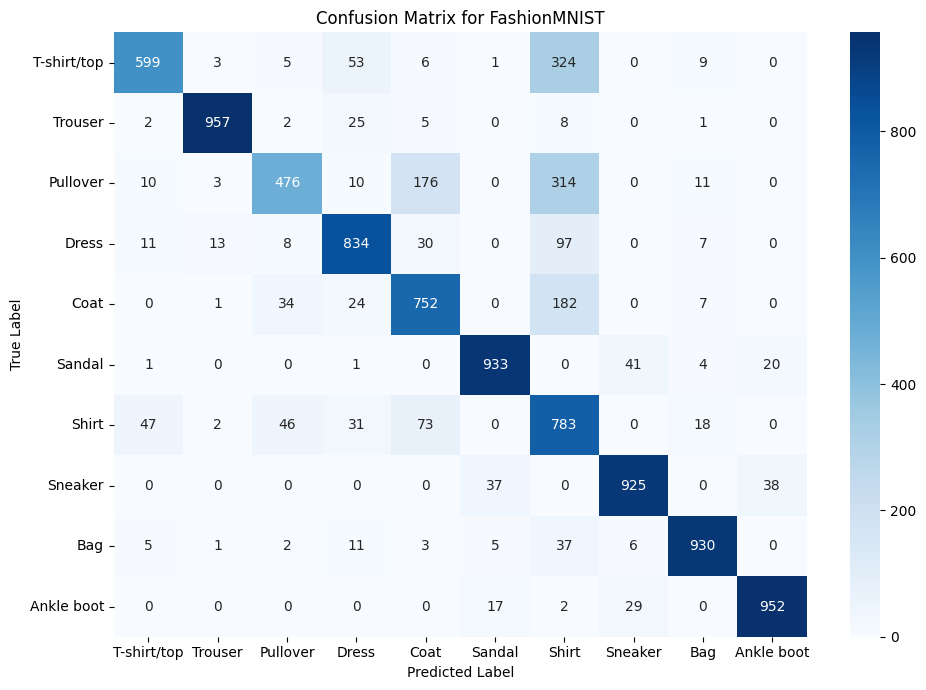

In [26]:
# Generate confusion matrix
cm = confusion_matrix(labels_test.numpy(), y_pred.numpy())

# Plot it
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.classes,
            yticklabels=test_data.classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for FashionMNIST')
plt.tight_layout()
plt.show()

In [27]:
model_b = ModelB()

criterion = nn.CrossEntropyLoss()
optimizer_b = torch.optim.SGD(model_b.parameters(), lr=0.1)
train(model_b, train_loader, criterion, optimizer_b)

Epoch 10/100, Loss: 0.2013
Epoch 20/100, Loss: 0.2057
Epoch 30/100, Loss: 0.2724
Epoch 40/100, Loss: 0.1982
Epoch 50/100, Loss: 0.1059
Epoch 60/100, Loss: 0.1105
Epoch 70/100, Loss: 0.1391
Epoch 80/100, Loss: 0.2829
Epoch 90/100, Loss: 0.0224
Epoch 100/100, Loss: 0.0422


In [28]:
model_b.eval()

with torch.no_grad():
    logits = model_b(images_test)
    y_pred = torch.argmax(logits, dim=1)


accuracy = accuracy_score(labels_test.numpy(), y_pred.numpy())
print(f"Accuracy Model B: {accuracy:.2f}")

print("\nClassification Report Model B:")
print(classification_report(labels_test.numpy(), y_pred.numpy(), target_names=test_data.classes))

print("\nConfusion Matrix Model B:")
print(confusion_matrix(labels_test.numpy(), y_pred.numpy()))


Accuracy Model B: 0.88

Classification Report Model B:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.74      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.84      0.81      1000
       Dress       0.93      0.83      0.88      1000
        Coat       0.80      0.81      0.81      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.64      0.76      0.70      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


Confusion Matrix Model B:
[[742   1  19  17   3   1 211   0   6   0]
 [  5 975   3   8   4   0   5   0   0   0]
 [  7   1 843   6  70   1  72   0   0   0]
 [ 20   8  19 835  52   1  60 

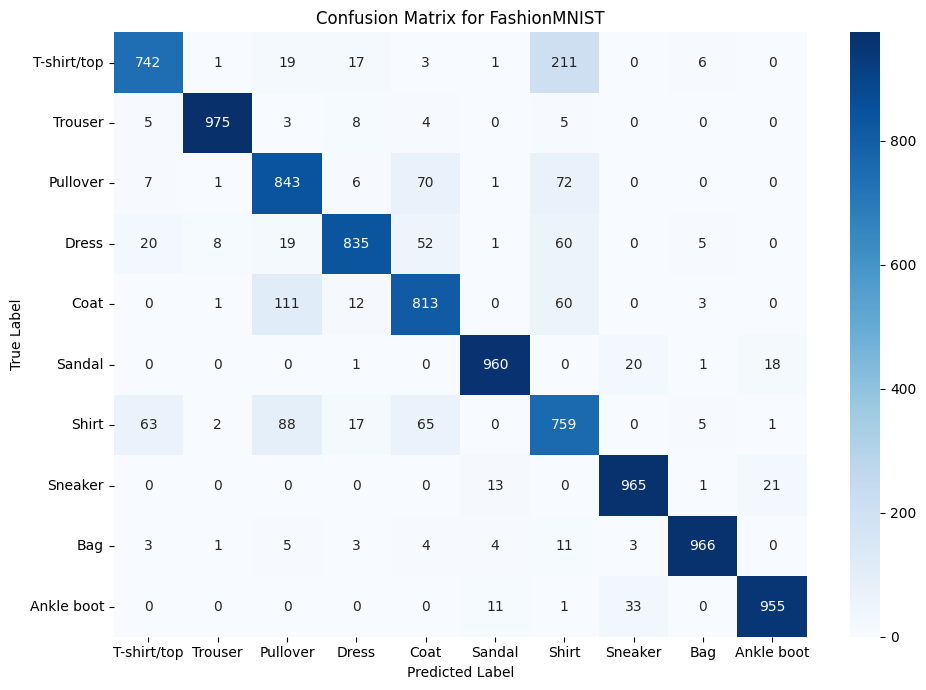

In [29]:
# Generate confusion matrix
cm = confusion_matrix(labels_test.numpy(), y_pred.numpy())

# Plot it
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.classes,
            yticklabels=test_data.classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for FashionMNIST')
plt.tight_layout()
plt.show()